In [1]:
%pylab inline
from tqdm.notebook import tqdm
from riboraptor.helpers import mkdir_p
from collections import OrderedDict, Counter
import pandas as pd
import proplot as plot
import seaborn as sns
from textwrap import wrap
plot.rc.fontname = 'Arial'
plot.rc.large = 22
plot.rc.small = 22
plot.rc.ticklen = 10
plot.rc.tickratio = 0.5
plot.rc.linewidth = 2
plot.rc.margin = 0.05
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams["font.weight"] = "bold"

Populating the interactive namespace from numpy and matplotlib


/gpfs/commons/home/schoudhary/software/anaconda3/envs/riboraptor/lib/python3.7/site-packages/proplot/config.py:555: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.
/gpfs/commons/home/schoudhary/software/anaconda3/envs/riboraptor/lib/python3.7/site-packages/proplot/config.py:555: ProPlotWarning: rc setting 'small' was renamed to text.labelsize in version 0.6.


In [2]:
def myround(x, base=50):
    return base * round(x/base)

In [3]:
def plot_go(df_subset, scale_factor=20, figsize=(15, 12)):
    fig, ax = plt.subplots(figsize=figsize)
    xidx = -np.log10(df_subset.GeneRatio)
    xidx = df_subset.GeneRatio
    yidx = np.arange(df_subset.shape[0])
    
    ylabels = df_subset.ID_str
    #ylabels = ['\n'.join(wrap(l, 30)) for l in ylabels]

    X, Y = np.meshgrid(xidx, yidx)

    sizes = df_subset['Count']*scale_factor
    counts = df_subset['Count']
    counts_unique = np.array(counts.unique())
    sizes_and_counts = zip(sizes.tolist(), counts)
    print(len(counts_unique))
    size_indexes = np.arange(0, len(counts_unique), int(len(counts_unique)/4))
    print(size_indexes)
    print(counts_unique)
    count_labels = list(counts_unique[size_indexes])

    for idx, row in df_subset.iterrows():
        #-np.log10(row['GeneRatio'])
        size = row['Count']

        if size in count_labels:
            a = ax.scatter(row['GeneRatio'], idx, 
                           s=row['Count']*scale_factor,
                           c='#7fcdbb', label = myround(size,5)),
            count_labels.remove(size)
        else:
            a = ax.scatter(row['GeneRatio'], idx, 
                           s=row['Count']*scale_factor,
                           c='#7fcdbb')# label = counts[idx]),
                       #cmap="OrRd")

    
    ax.set_yticks(yidx)

    xlabels = np.round(np.array(list(sorted(unique(xidx)))),2)
    #ax.set_xticks(list(sorted(unique(xidx))))
    #ax.set_xticklabels(xlabels, rotation=90, ha="center")
    ax.set_yticklabels(ylabels)

    #ax.set_xlabel("GeneRatio")
    #ax.set_ylabel("Cluster")
    ax.yaxis.set_tick_params(which='minor', bottom=False)
    ax.xaxis.set_tick_params(which='minor', bottom=False)

    ax.legend(loc=(1.05, 0.5), frameon=False, title='Count', labelspacing=1)
    ax.set_ylabel('')#Term')
    ax.set_xlabel('Gene Ratio')
    ax.grid(False)
    fig.tight_layout()
    return fig

9
[0 2 4 6 8]
[ 9 10 11 12 13 15 17 18 20]


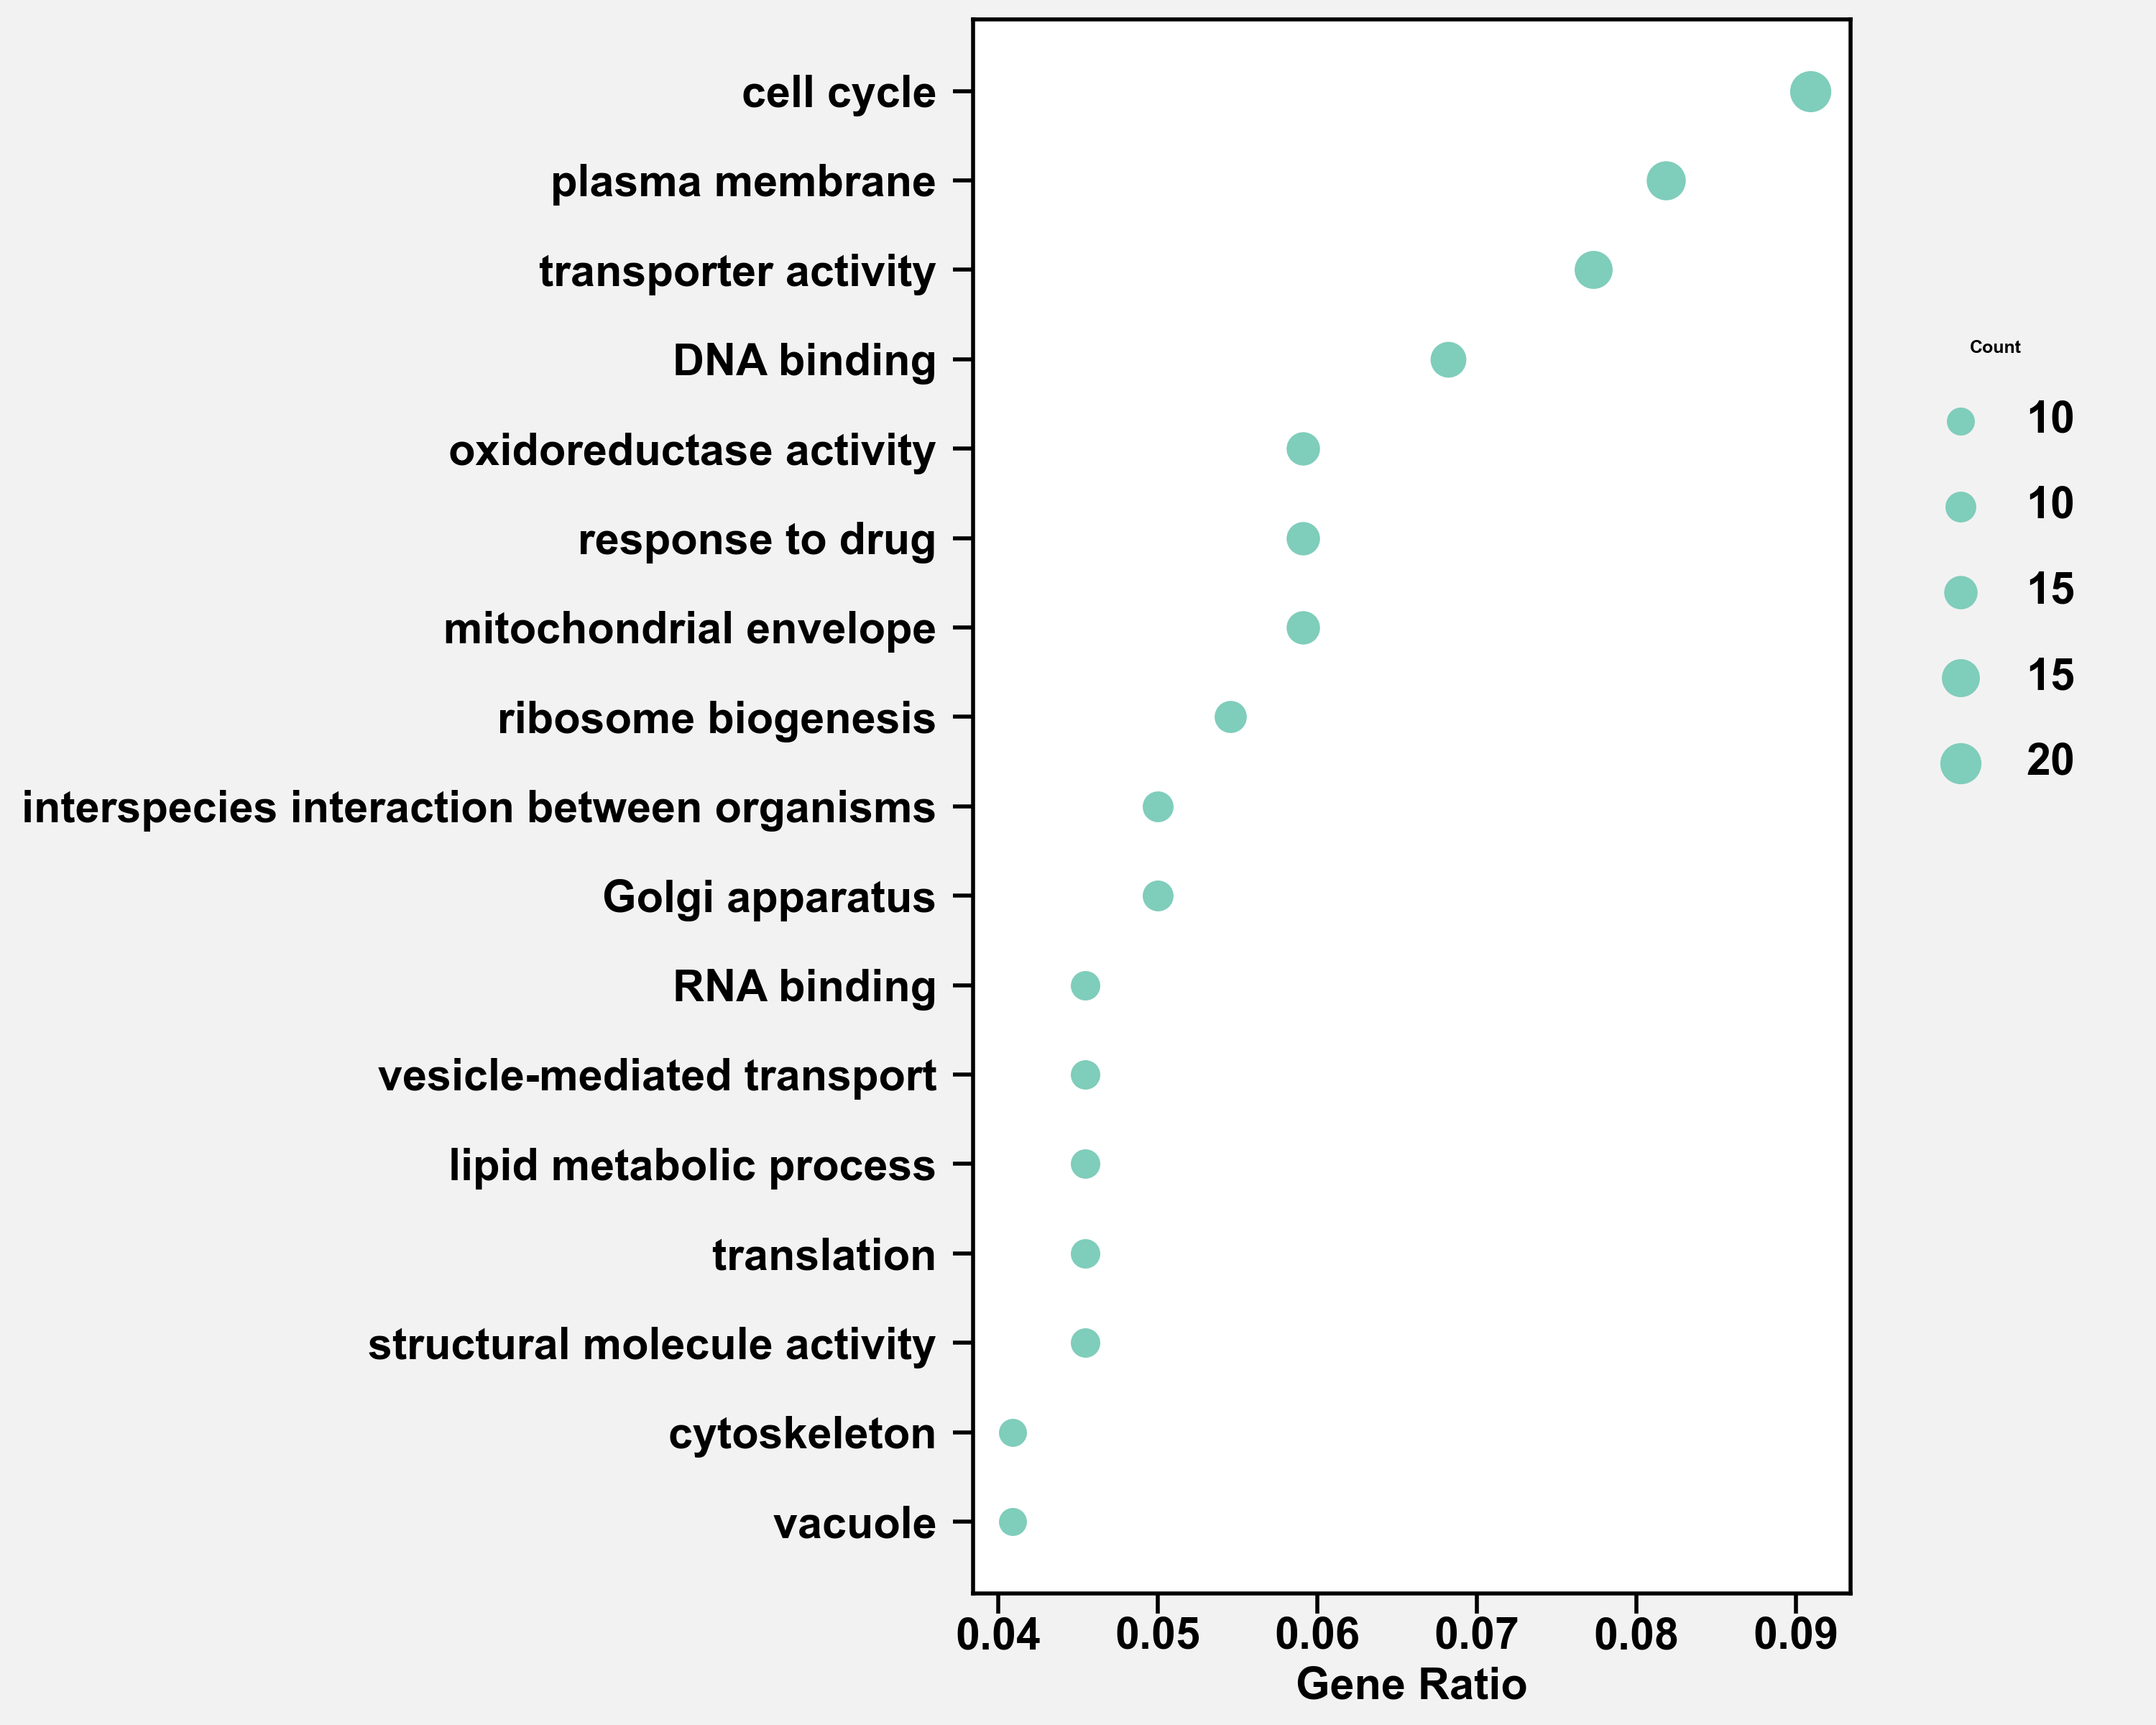

In [4]:
#df = pd.read_csv('~/github/C_albicans_Fluconazole_2019/plots/08.Ontology_slim//TE/TE_fluconazole_VS_nodrug_log2FC1_padj05_pos_cutoff05.tsv', sep=",")
df = pd.read_csv('~/github/C_albicans_Fluconazole/Tables/GOslim/TE_log2FC1_padj05_pos.tsv', sep="\t")

df['GeneRatio'] = df['GeneRatio'].apply(lambda x: eval(x))


df['ID_str'] = df.ID.str.split('(').str.get(0)
df_subset = df.loc[df.GeneRatio >= 0.04].sort_values(by=['pvalue', 'GeneRatio'], 
                                                                   ascending=[True, False]).reset_index(drop=True)
df_subset = df_subset.sort_values(by=['GeneRatio', 'pvalue'], 
                                           ascending=[True, True]).reset_index(drop=True)
#df_subset['GeneRatio'] = np.round(df_subset['GeneRatio'], 2)
fig = plot_go(df_subset)
fig.savefig('/gpfs/commons/home/schoudhary//github/C_albicans_Fluconazole_2019/plots/08.Ontology_slim//TE/TE_fluconazole_VS_nodrug_log2FC1_padj05_pos_cutoff05_cleaned.pdf')

10
[0 2 4 6 8]
[ 7  8  9 10 11 13 14 16 17 18]


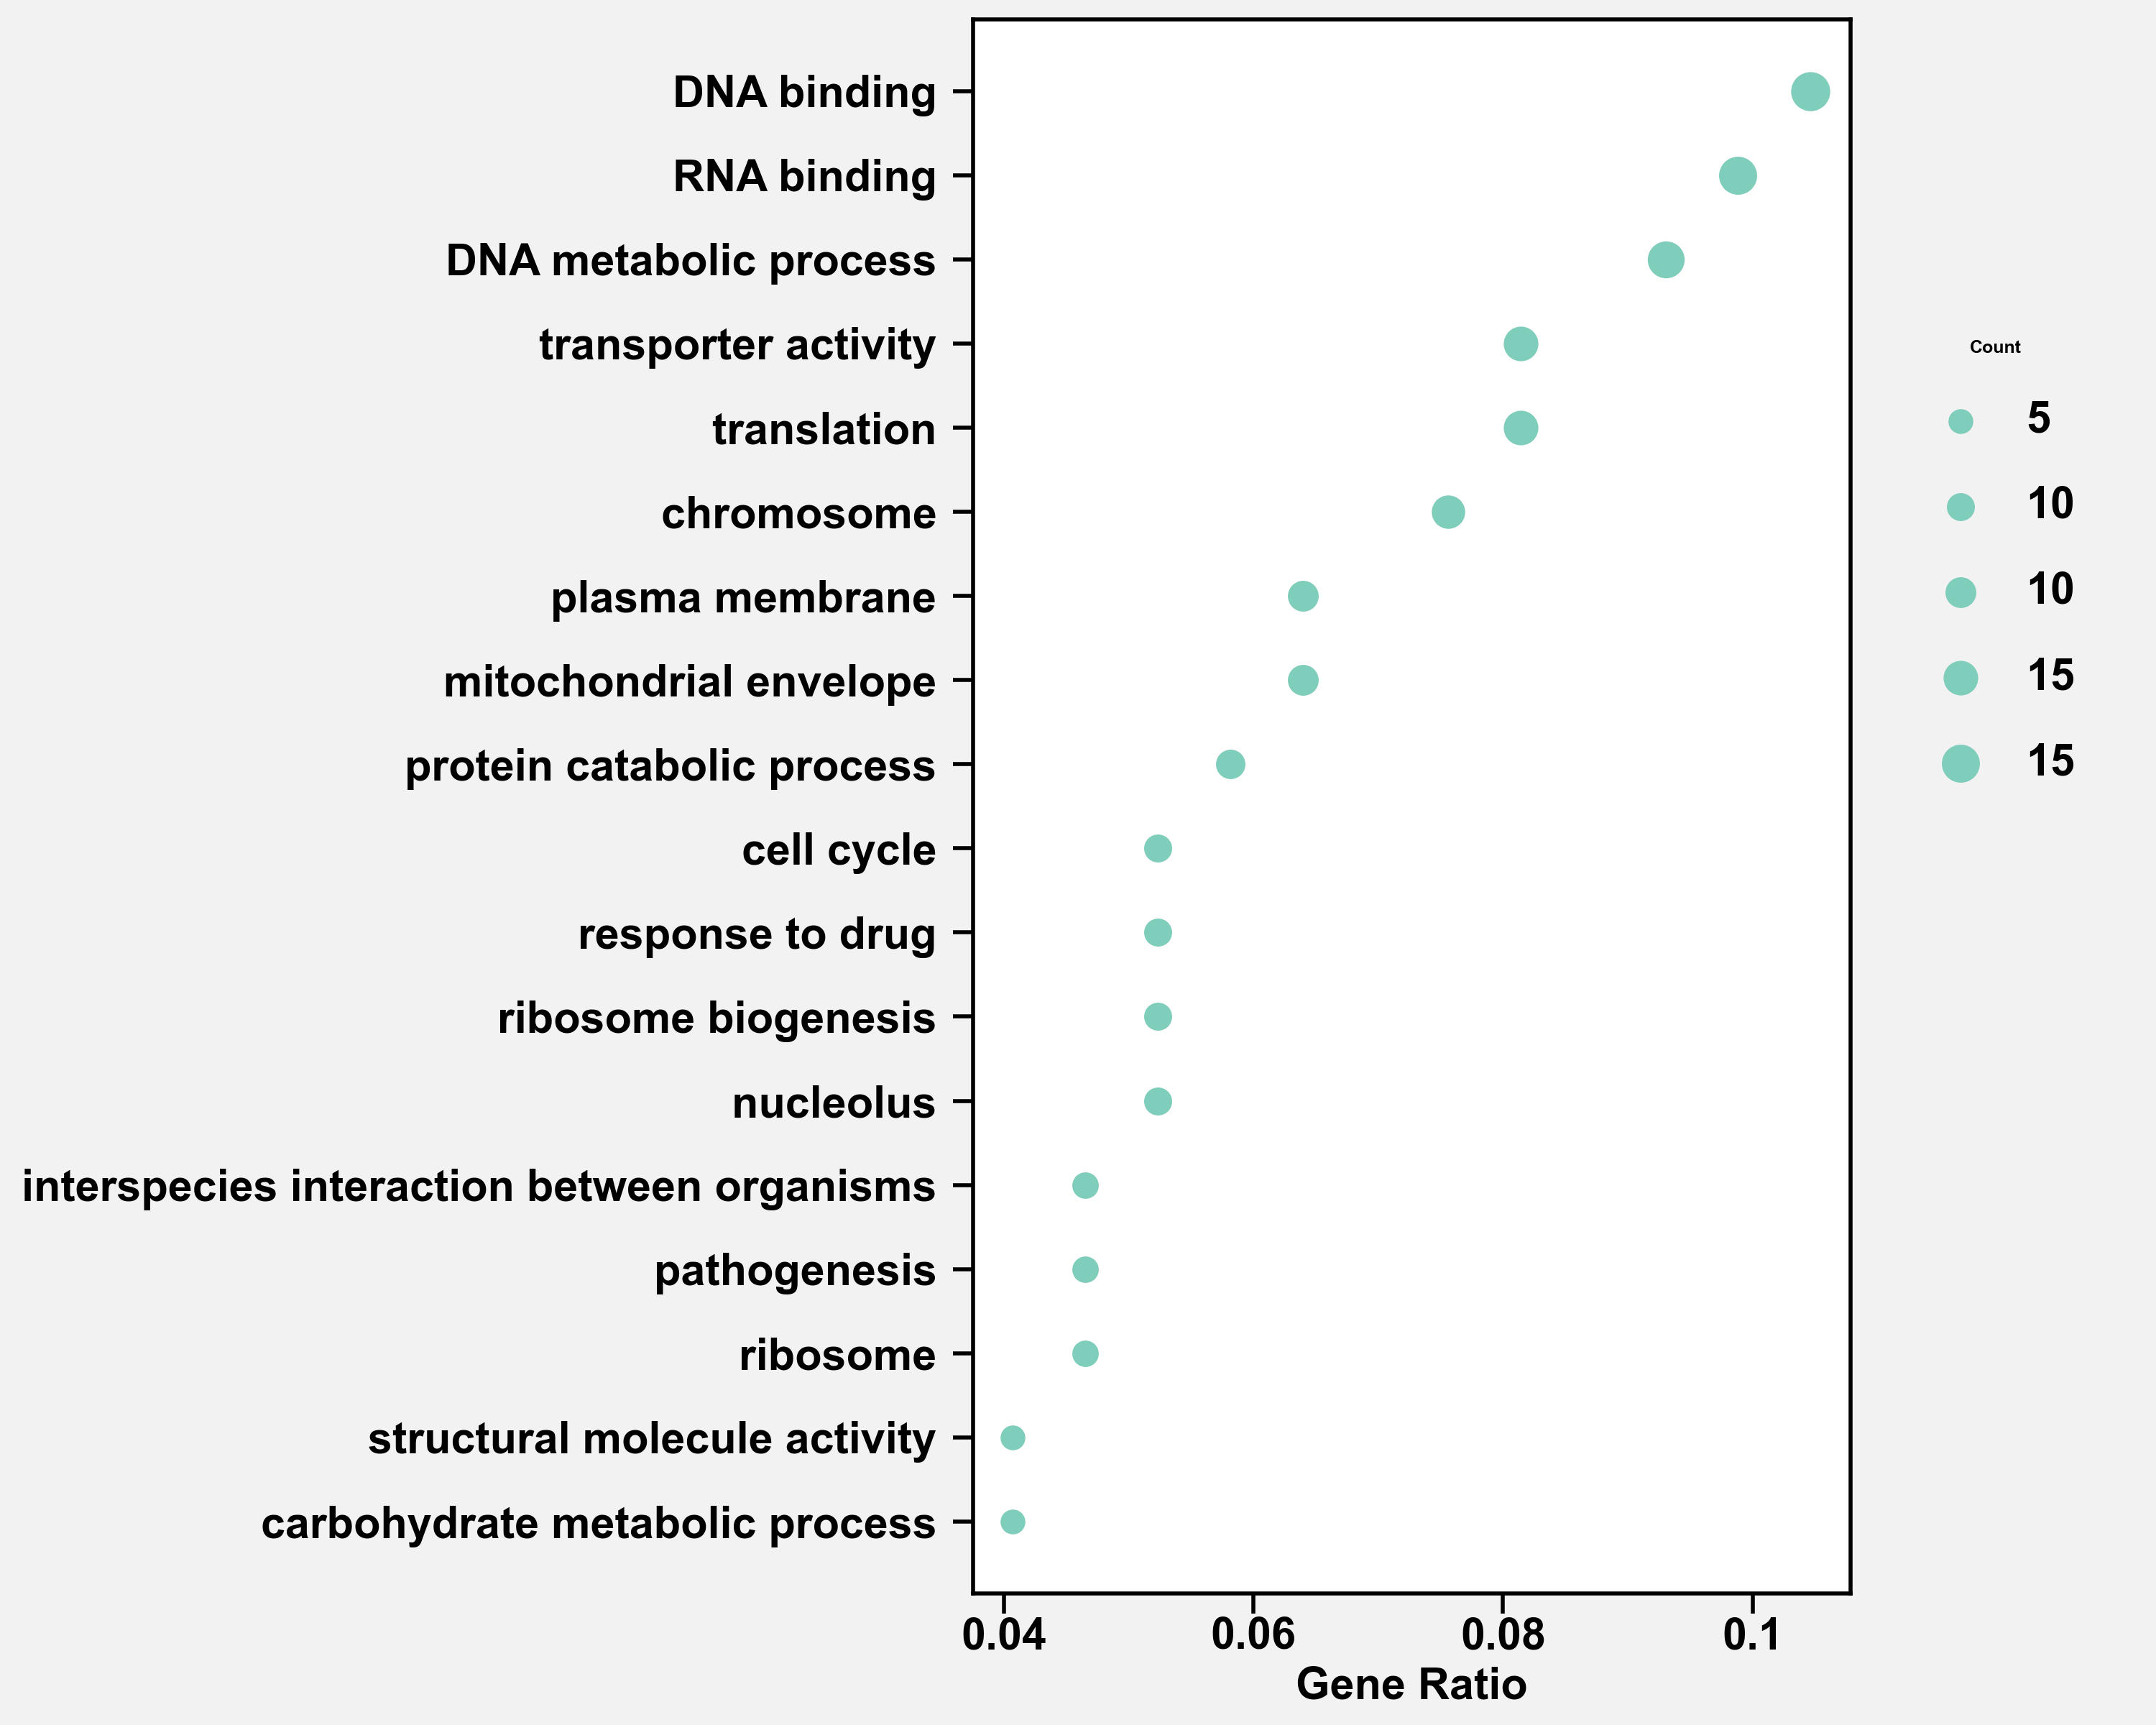

In [5]:
#df = pd.read_csv('~/github/C_albicans_Fluconazole_2019/plots/08.Ontology_slim//TE/TE_fluconazole_VS_nodrug_log2FC1_padj05_neg_cutoff05.tsv', sep=",")
df = pd.read_csv('~/github/C_albicans_Fluconazole/Tables/GOslim/TE_log2FC1_padj05_neg.tsv', sep="\t")

df['GeneRatio'] = df['GeneRatio'].apply(lambda x: eval(x))

df['ID_str'] = df.ID.str.split('(').str.get(0)
df_subset = df.loc[df.GeneRatio >= 0.04].sort_values(by=['pvalue', 'GeneRatio'], 
                                                                   ascending=[True, False]).reset_index(drop=True)
df_subset = df_subset.sort_values(by=['GeneRatio', 'pvalue'], 
                                           ascending=[True, True]).reset_index(drop=True)
#df_subset['GeneRatio'] = np.round(df_subset['GeneRatio'], 2)
fig = plot_go(df_subset)
fig.savefig('/gpfs/commons/home/schoudhary//github/C_albicans_Fluconazole_2019/plots/08.Ontology_slim//TE/TE_fluconazole_VS_nodrug_log2FC1_padj05_neg_cutoff05_cleaned.pdf')

In [20]:
df_subset

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,ID_str
0,cellular homeostasis (GO:0019725),cellular homeostasis (GO:0019725),0.04,198/5719,0.393832,0.992875,0.979811,C2_00600C/C7_00090C/C2_07730W/C6_02920C/C4_067...,6,cellular homeostasis
1,oxidoreductase activity (GO:0016491),oxidoreductase activity (GO:0016491),0.04,406/5719,0.953514,0.992875,0.979811,C4_03350C/C6_03880W/CR_05170C/C2_09400C/C1_035...,6,oxidoreductase activity
2,structural molecule activity (GO:0005198),structural molecule activity (GO:0005198),0.05,213/5719,0.301249,0.992875,0.979811,C1_06790C/CR_07320C/CR_07760W/C2_05410W/C2_010...,7,structural molecule activity
3,pathogenesis (GO:0009405),pathogenesis (GO:0009405),0.05,269/5719,0.535160,0.992875,0.979811,C2_10290W/C1_06940C/C2_09400C/C7_02800W/C2_077...,7,pathogenesis
4,interspecies interaction between organisms (GO...,interspecies interaction between organisms (GO...,0.05,330/5719,0.746934,0.992875,0.979811,C2_10290W/C1_06940C/C2_09400C/C7_02800W/C2_077...,7,interspecies interaction between organisms
5,cell cycle (GO:0007049),cell cycle (GO:0007049),0.05,448/5719,0.946998,0.992875,0.979811,C3_02450W/C5_02020C/CR_06160C/C7_00370W/C7_029...,7,cell cycle
6,ribosome (GO:0005840),ribosome (GO:0005840),0.05,182/5719,0.093005,0.692433,0.683322,C1_06790C/CR_07320C/C2_10850C/CR_07760W/C2_054...,8,ribosome
7,nucleolus (GO:0005730),nucleolus (GO:0005730),0.05,218/5719,0.192675,0.770699,0.760558,CR_06480C/CR_01710W/C1_08130C/C3_06150W/CR_080...,8,nucleolus
8,ribosome biogenesis (GO:0042254),ribosome biogenesis (GO:0042254),0.05,297/5719,0.490635,0.992875,0.979811,CR_01710W/C2_09380W/CR_06720W/CR_05660W/CR_080...,8,ribosome biogenesis
9,response to drug (GO:0042493),response to drug (GO:0042493),0.06,390/5719,0.672980,0.992875,0.979811,CR_08180C/CR_02800C/C1_01570C/C1_06940C/C1_144...,9,response to drug


In [9]:
df = pd.read_csv('~/github/C_albicans_Fluconazole/Tables/GOslim/DErna_log2FC1_padj05_neg.tsv', sep="\t")
df.Count.max()

97

24
[ 0  6 12 18]
[11 12 13 14 15 16 17 18 22 23 27 32 33 35 36 40 42 48 49 55 69 77 87 97]


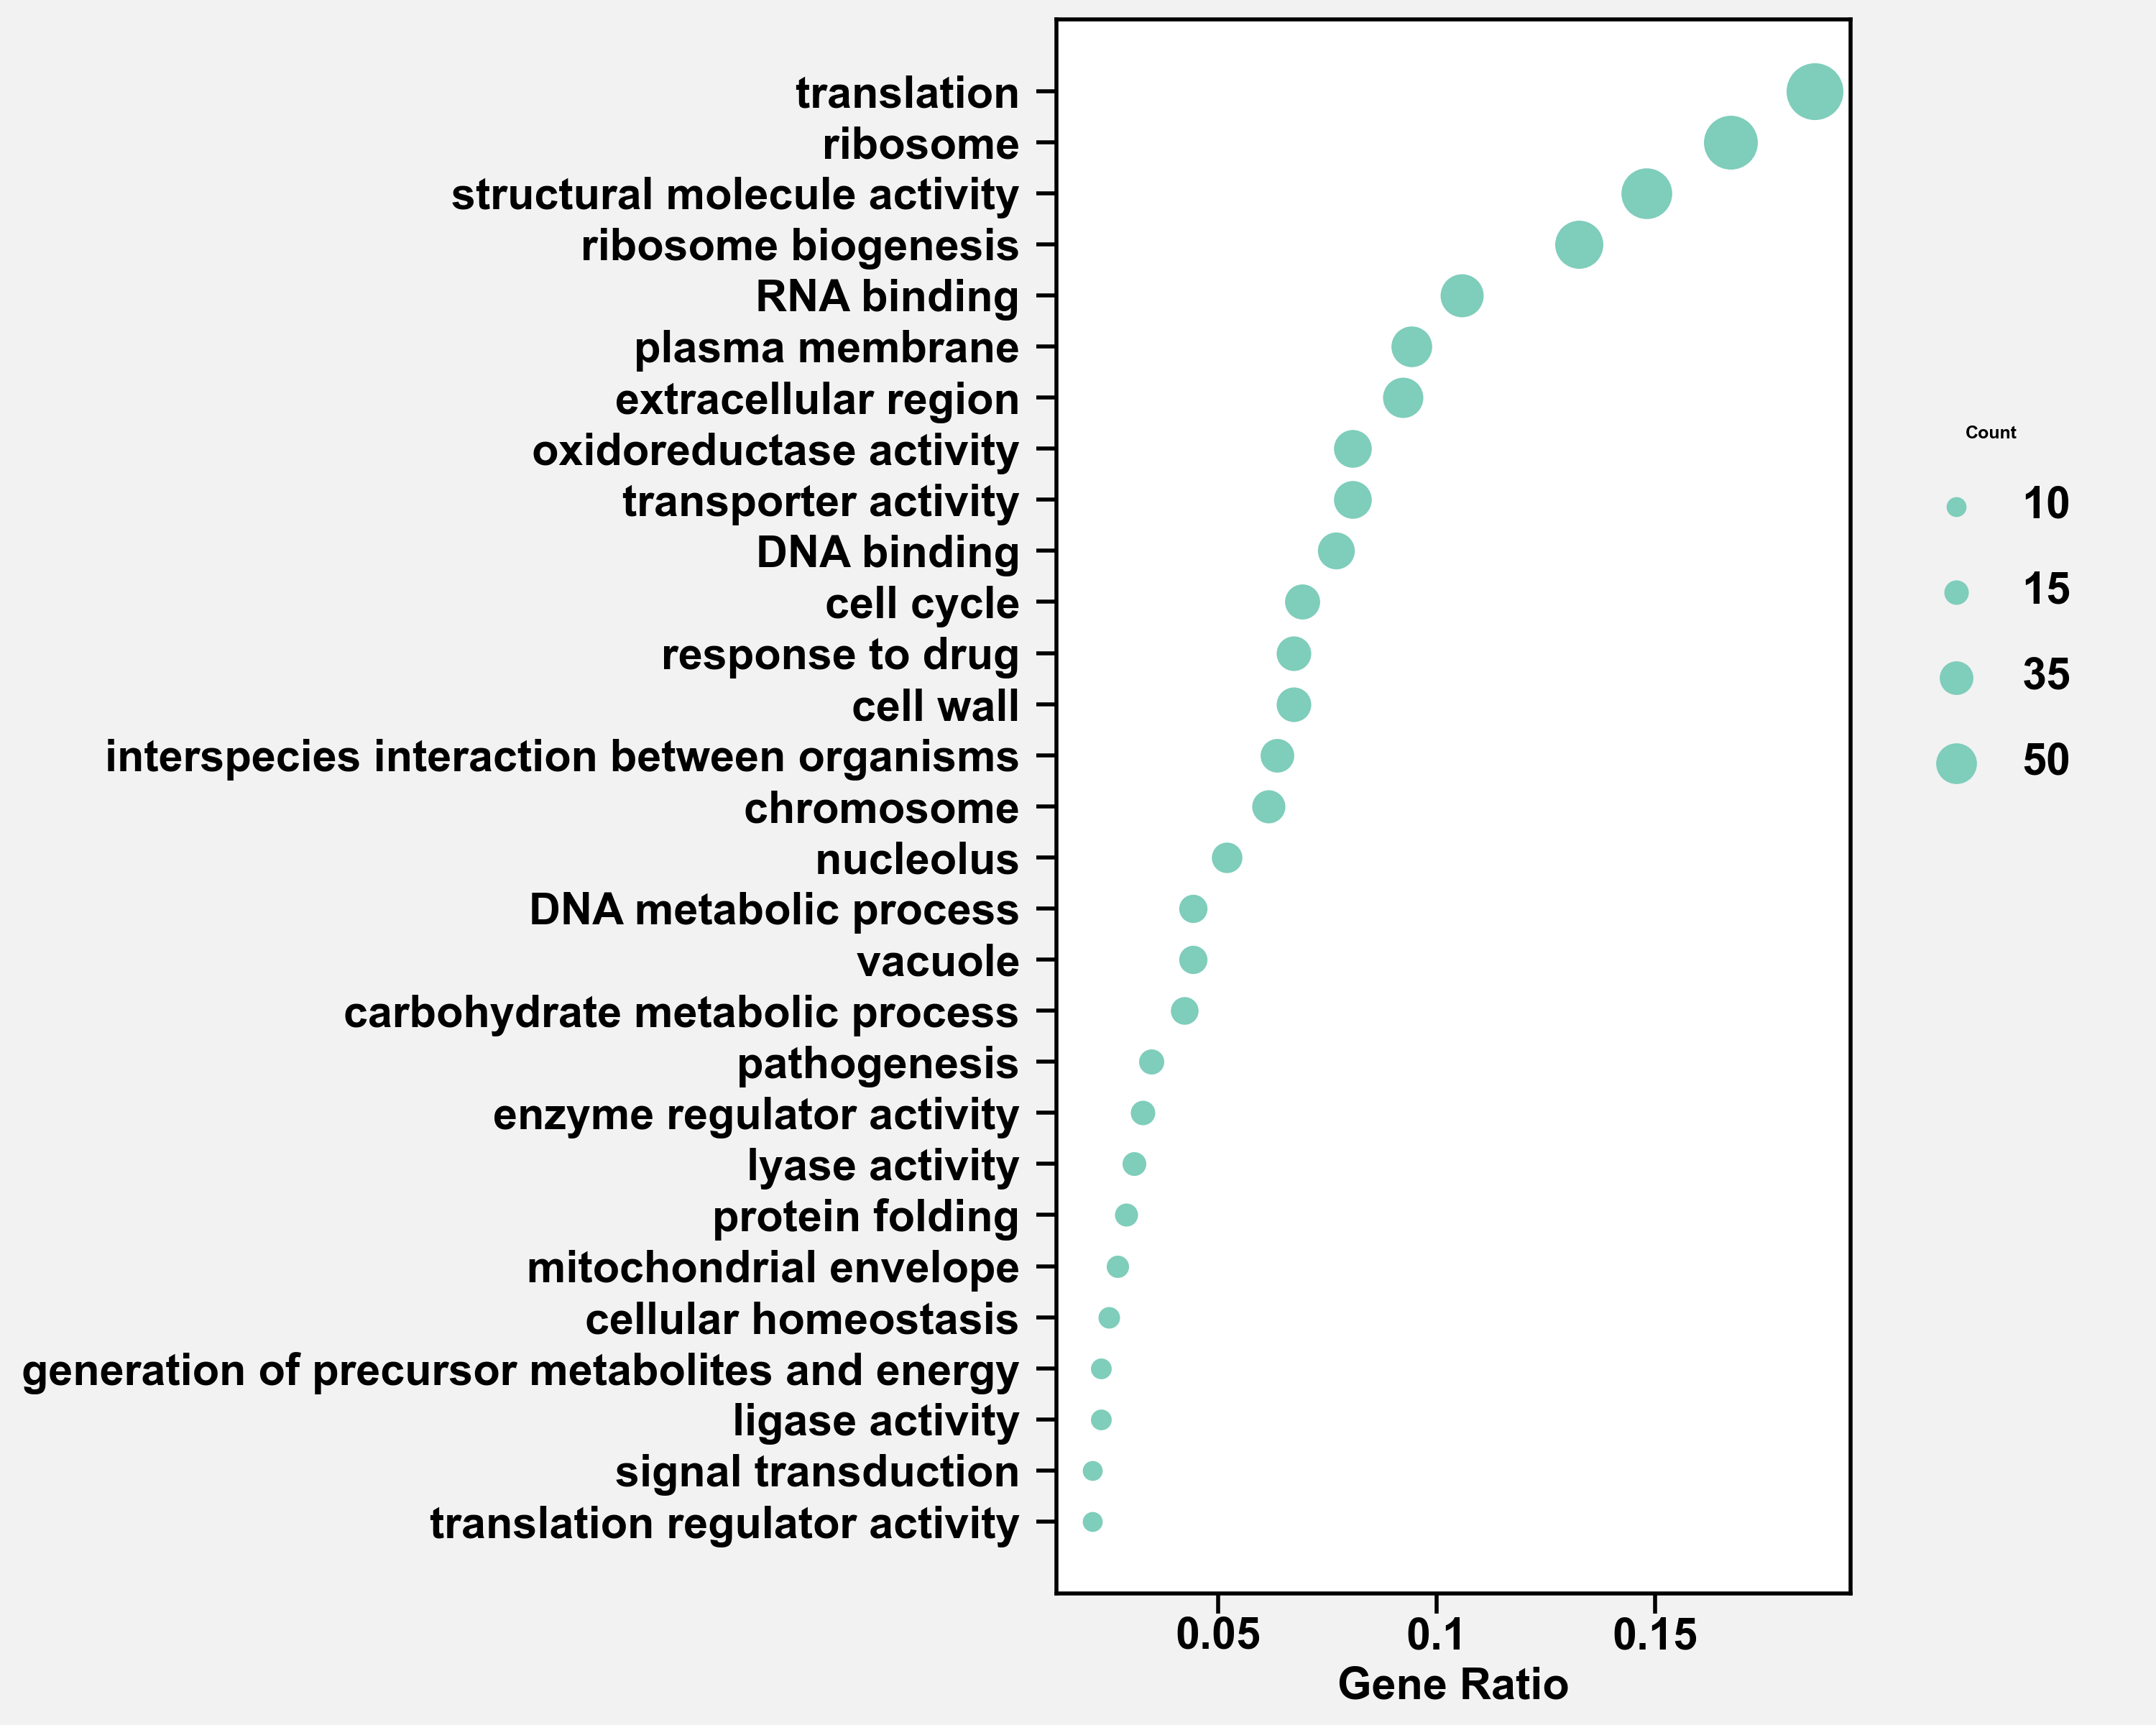

In [6]:
#df = pd.read_csv('~/github/C_albicans_Fluconazole_2019/plots/08.Ontology_slim//DE_rna/DErna_fluconazole_VS_nodrug_log2FC1_padj05_neg_cutoff05.tsv', sep=",")
df = pd.read_csv('~/github/C_albicans_Fluconazole/Tables/GOslim/DErna_log2FC1_padj05_neg.tsv', sep="\t")

df['GeneRatio'] = df['GeneRatio'].apply(lambda x: eval(x))

df['ID_str'] = df.ID.str.split('(').str.get(0)
df_subset = df.loc[df.GeneRatio >= 0.02].sort_values(by=['pvalue', 'GeneRatio'], 
                                                                   ascending=[True, False]).reset_index(drop=True)
df_subset = df_subset.sort_values(by=['GeneRatio', 'pvalue'], 
                                           ascending=[True, True]).reset_index(drop=True)
#df_subset['GeneRatio'] = np.round(df_subset['GeneRatio'], 2)
fig = plot_go(df_subset, 8)
fig.savefig('/gpfs/commons/home/schoudhary//github/C_albicans_Fluconazole_2019/plots/08.Ontology_slim//DE_rna/DErna_fluconazole_VS_nodrug_log2FC1_padj05_neg_cutoff05_cleaned.pdf')

16
[ 0  4  8 12]
[13 14 15 16 18 19 21 22 23 27 34 39 42 43 48 51]


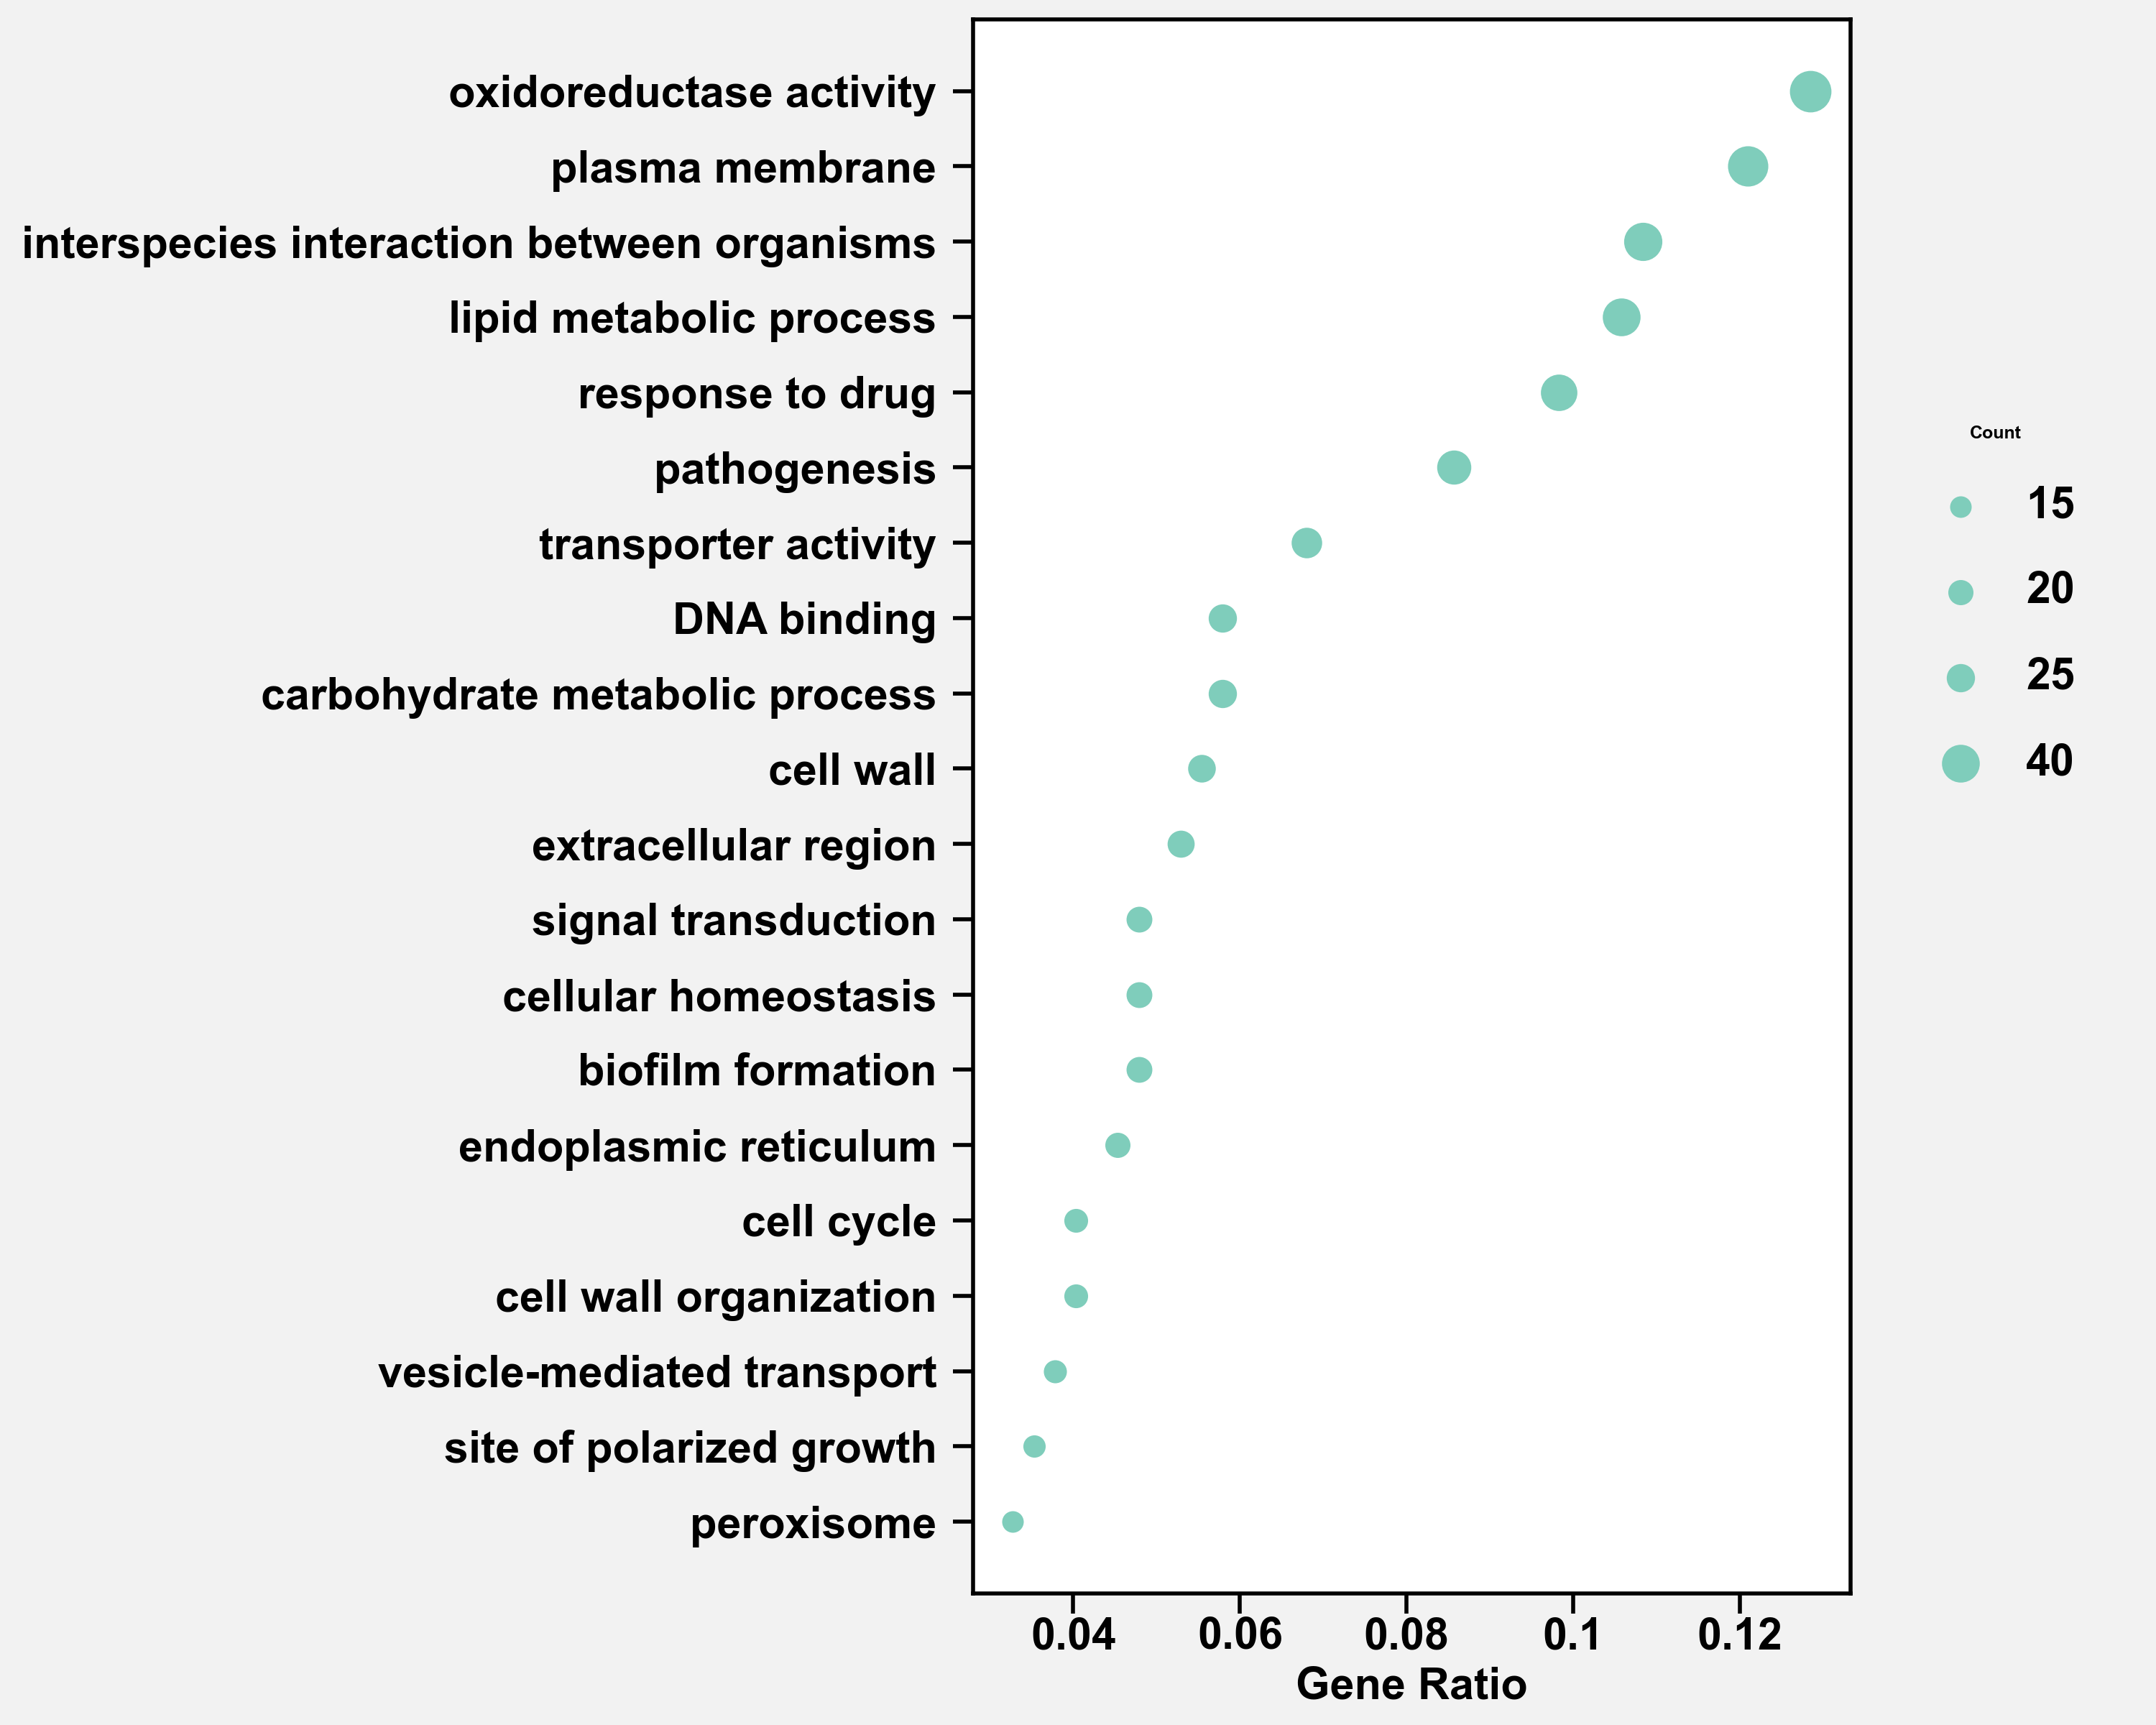

In [7]:
#df = pd.read_csv('~/github/C_albicans_Fluconazole_2019/plots/08.Ontology_slim//DE_rna/DErna_fluconazole_VS_nodrug_log2FC1_padj05_pos_cutoff05.tsv', sep=",")
df = pd.read_csv('~/github/C_albicans_Fluconazole/Tables/GOslim/DErna_log2FC1_padj05_pos.tsv', sep="\t")

df['GeneRatio'] = df['GeneRatio'].apply(lambda x: eval(x))

df['ID_str'] = df.ID.str.split('(').str.get(0)
df_subset = df.loc[df.GeneRatio >= 0.03].sort_values(by=['pvalue', 'GeneRatio'], 
                                                                   ascending=[True, False]).reset_index(drop=True)
df_subset = df_subset.sort_values(by=['GeneRatio', 'pvalue'], 
                                           ascending=[True, True]).reset_index(drop=True)
#df_subset['GeneRatio'] = np.round(df_subset['GeneRatio'], 2)
fig = plot_go(df_subset, 8)
fig.savefig('/gpfs/commons/home/schoudhary//github/C_albicans_Fluconazole_2019/plots/08.Ontology_slim//DE_rna/DErna_fluconazole_VS_nodrug_log2FC1_padj05_pos_cutoff05_cleaned.pdf')